# Team Quantimize
## Overview of this notebook:
### Setup:
- Project structure
- Installation
### Usage:
- Data preparation
- Visualization
- Classic solutions
- Quantum solutions
- Air security
- Benchmarks
- Results and discussion

This notebook shall run without any errors or problems and should demonstrate the result of our work, as well as a comparision and a possible quantum advantage.

## Setup
### Project structure
The project is structured the following way:
Quantimize.ipynb is the main entry point. Every file has a brief explanation of what it contains and what it does.
- quantimize/:
    - classic/:
        - classic_solution.py: for the genetic algorithm (GA)
        - toolbox.py:for the straight line solution and various needed methods for the GA
    - data/:
        - aCCF_0623_p_spec.nc: the original atmospheric data file
        - atmo.json: the new created atmospheric data file
        - bada_data.csv: file containing information about the flight level/TAS/ROC/ROD and fuel consumption
        - bada_data.json: file containing the same information but in a different format
        - flights.csv: file containing information about all the flights (start, stop, FL)
        - flights.json: file containing the same information but in a different format
    - quantum/:
        - QGA.py: as the quantum genetic algorithm
        - quantum_solution.py: containing the QAOA algorithm
        - quantum_neural_network.py: containing the quantum neural network
        - toolbox.py: containing additional functions
    - air_security.py: for air security related checks
    - classic_summary.py: for calls to classic functions
    - converter.py: for conversion of units (kts->km/h, minutes->seconds)
    - create_json_data.py: to explain how we generated our datafiles
    - data_access.py: gives access to all the converted data and returns them
    - quantum_summary.py: for calls to quantum functions
    - visualisation.py: for all visualisation related functions
### Installation
The package can be cloned from github using 
```commandline
git clone https://
cd quantimize
```
After that, one needs to install all required packages using
```commandline
pip install requirements.txt
```
Now, everything should be ready and set up to further run this notebook.

## Usage
This section is dedicated to show how the notebook can be used and to show our work and results.
### Data preparation
The data preparation is all related to the file ```create_json_data.py```. It can be used as a standalone application to convert all three given files (atmospheric data, flight data, flight list) into the corresponding .json files. This was done to get a better handle over the files and to adapt the access to our purposes. For example, some flight levels were converted from hPa to FL for simpler calculations and visualisations on. Requirement for the file to run is, that there has to be a folder data (like in this project) in the current working directory. Also the files need to have the specific names for successful conversion. Further explanaition can be found in the file itself. We now want to concentrate more on the work done.
### Notebook preparation
Important imports to make this notebook work as expected

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

### Visualisation
Visualisation is done for a better understanding of the data and of course for nice pictures to look at. To use the visualisation, we first have to import the visualisation part of the package. Also the datetime package, because we need to work with time objects.

In [2]:
from quantimize import visualisation as vs
from datetime import time as t

We can now access all functions in it. As an example, we want to plot the atmospheric data of a certain flightlevel and time and see how it looks like. We choose FL = 295 and a time of 8 o'clock in the morning.

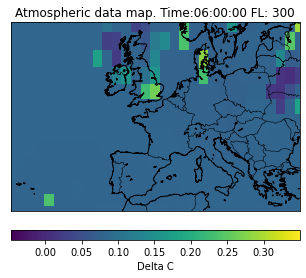

In [3]:
vs.make_atmo_map(295, t(8,0,0))

You will get the atmospheric data plotted in different colors, corresponding to the value and normalized to the min and max value available. In the title, you can also see, that there were some assumptions:
1. We have no atmospheric data for FL 295, so we choose the closest, which is FL 300
2. We also do not have atmospheric data for 8 o'clock in the morning. Therefore, we refer to 6 o'clock in the morning.

Regarding the time, we split the time in intervals from 6 to 9 corresponding to the data of 6 o'clock, 9 to 15 corresponding to the data of 12 o'clock and 15 to 21 corresponding to the data of 18 o'clock.

We also can animate the atmospheric data either for a fixed time variing in the FL or vice verca with a fixed FL variing in time. These function do not work in this notebook, because they are repetitive. To see the results, you need to import the package and run the code in a commandline. For completion it is shown here:

[100, 125, 150, 175, 200, 225, 250, 300, 350, 400, 450, 500, 550, 600]


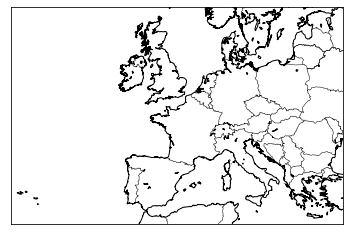

In [4]:
vs.make_animated_atmo_FL_map(t(12))

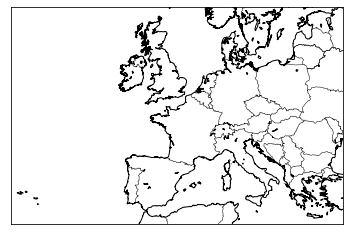

In [5]:
vs.make_animated_atmo_day_map(300)

Further visualisation will be presented, when showing flight paths.
### Classic solutions
In our work, we provide two different classic solutions. One being the simplest, the straight line solution, and the other being the genetic algorithm (GA).
#### Straight line solution
The straight line solution, as the name suggests, just computes a straight line from start to end, without any variation. The function takes the flight number (4) and a timestep dt, here 300 seconds, as input.

In [6]:
flight_nr = 17
dt = 300

In [7]:
import quantimize.classic_summary as classic_solution
trajectory_sls = classic_solution.straight_line_solution(flight_nr, dt)

The trajectory can now be plotted as a 2D graph for example. First we create a map and then plot the flight path.

C:\Users\Jakob\AppData\Roaming\Python\Python38\site-packages\matplotlib\animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


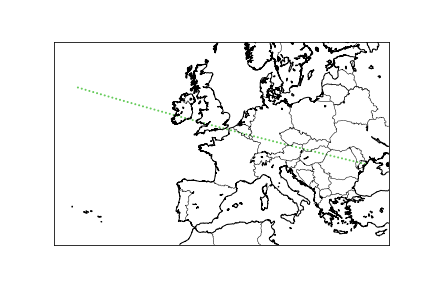

In [8]:
%matplotlib widget
map = vs.make_map()
vs.scatter_flight_path_on_map(map, trajectory_sls)

In the graph, you can see a dotted line showing the flight path. We can also now calculate the cost.

In [9]:
cost = classic_solution.compute_cost(trajectory_sls)
print(cost)

1809.7816494012725


The cost has the dimenstion 10e-12 K.

#### Genetic algorithm solution
In the genetic algorithm solution (GA) we use the genetic algorithm to find boundary points and then calculate from these points the optimal flight trajectory.

In [10]:
report, solution, trajectory_ga = classic_solution.genetic_algorith_solution(flight_nr, dt)

 The best solution found:                                                                           
 [ -8.64131875   6.605047    10.94099137  50.2670688   48.37278487
  48.35377563 340.61681602 368.90918182 322.01938526 310.16356978
 326.25146291]

 Objective function:
 1280.5104223950257


The objective function also contains already the cost of this flight. We can now also plot this again, this time in 3D to see the flight level changes and the atmospheric data. The flight trajectory is also mapped to a uniform time distance for later calculations.

(<Axes3DSubplot:>, <mpl_toolkits.basemap.Basemap at 0x1e8e67ead30>)

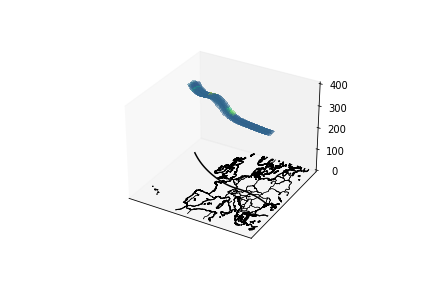

In [18]:
ax, map = vs.make_3d_map()
vs.plot_flight_path_on_map_3d_with_atmo_as_slices(ax, map, trajectory_ga)

The colors represent the value of the atmospheric data in squares around the flight path point. On the ground you can see the projection of the flight path. It clearly shows, that with variation in the flight height, one can obtain already a much better result than just staying on the same flight level. We can also check the cost, but these should be similar to the objective function.

In [19]:
cost = classic_solution.compute_cost(trajectory_ga)
print(cost)

1263.6865003424703


The small deviation comes from a different spacing of the points as mentioned above, but is in the same order as the original result.

### Quantum solution
Our quantum solutions consist of three different. The first is the quantum equivalent to the genetic algorithm. The second one ist a quantum neural network and the third one is a mapping of atmospheric data to a qubit grid.
#### Quantum genetic algortihm


In [13]:
import quantimize.quantum_summary as quantum_solution
trajectory_qga = quantum_solution.quantum_genetic_algorith_solution(flight_nr, dt)

KeyboardInterrupt: 

We can again plot this trajectory and compute its cost

In [ ]:
ax, map = vs.make_3d_map()
vs.plot_flight_path_on_map_3d_with_atmo_as_slices(ax, map, trajectory_qga)
cost = classic_solution.compute_cost(trajectory_qga)
print(cost)

As one can see, the algorithm gives an output, which is not as smooth as the classic solution. The climate efficiency is slightly better than for the classic GA.


#### Quantum neural network
The quantum neural network takes already precalculated boundary points and tries to optimize those further. We use the boundary points from the previous classic GA algorithm.

In [14]:
ctrl_pts = solution['variable']
optimized_ctrl_pts = quantum_solution.quantum_neural_network(flight_nr, 6, ctrl_pts)

Iteration = 2, Number of device executions = 2, Cost = 1391.7871180292752
Iteration = 3, Number of device executions = 3, Cost = 1411.4688363743676
Iteration = 4, Number of device executions = 5, Cost = 1444.3044429406502
Iteration = 5, Number of device executions = 6, Cost = 1456.8824121352816
Iteration = 6, Number of device executions = 8, Cost = 1832.559815382944
Iteration = 7, Number of device executions = 9, Cost = 1283.8670972521486
Iteration = 8, Number of device executions = 11, Cost = 1507.9168445454527
Iteration = 9, Number of device executions = 12, Cost = 1393.4266663975045
Iteration = 10, Number of device executions = 14, Cost = 1443.3749528185679
Iteration = 11, Number of device executions = 15, Cost = 1510.6575680196713
Iteration = 12, Number of device executions = 17, Cost = 1292.3505513678012
Iteration = 13, Number of device executions = 18, Cost = 1724.8434639616198
Iteration = 14, Number of device executions = 20, Cost = 1708.4351890143719
Iteration = 15, Number of d

In [15]:
print(optimized_ctrl_pts)

     fun: 1896.766603973783
 message: 'terminated after reaching max number of iterations'
    nfev: 100
     nit: 50
 success: True
       x: array([  -3.61975425,  441.12663642,  300.42760902,  152.68173052,
       -341.513981  ,  237.81885861,  -11.00231713,  348.47281965,
        234.31601805, -119.8459866 ,  -37.13436367,   79.37969206,
          7.97126835,   18.39214128,  323.70915522,   36.28212802,
       -478.39422959,  -61.15396836,  197.02040885,  383.31071073,
       -382.10257755,   68.48597392,  217.66648215,  414.87948509,
       -340.73640479, -150.33609794,  560.07587603,  201.6992992 ,
         20.57290054,   12.47248691,  -99.26192913,   94.61729263,
         98.60010551, -182.40294508,  500.74038404, -243.49829989,
       -272.087374  , -585.08461695, -364.05338606, -286.38958693,
        248.00264676,  -43.90895731,  151.92696138,  -12.06788741,
        587.28924012, -117.16128884,  -90.96537853,   72.81846311,
       -368.46346917,  -86.72043555,  132.30182191,  

#### Qubit grid

In [20]:
gc = quantum_solution.sample_grid()
a,b,c = quantum_solution.run_QAOA(gc)

Cost function in Ising Hamiltonian form: -3.0*Z11*Z12 - 1.0*Z11*Z21 - 6.0*Z11 - 5.0*Z12*Z22 - 3.0*Z21*Z22 + 10.0*Z22
Cost function in QUBO form: -12.0*q11*q12 - 4.0*q11*q21 - 4.0*q11 - 20.0*q12*q22 + 16.0*q12 - 12.0*q21*q22 + 8.0*q21 + 36.0*q22 - 16.0


In [23]:
print(c)

[[ 1.  1.  1.  0.]
 [ 1.  1. -1. -1.]
 [ 1. -1. -1. -1.]
 [ 0. -1. -1. -1.]]


### Air security
Air security is essential for all planes in the air to avoid crashes and to save lives. After a flight trajectory is calculated, one has to check that the route has no steeper turns than 25°, that the plane is at least 10 FL above and below of other planes or has a distance of 5 nm (9,26 km) to the next plane. This can be checked with our air safety functions.

Since our code relys on timestamps, we first want do do an estimation of how close we have to choose our timesteps:
$\\s = 9.26km\\$
$v_{max} = 459kts = 850 km/h\\$
$t = \frac{s}{v_{max}} = 39,2 s\\$

To further enhance this, we reduce the time to 15 s. This fits good in a general scale of time(minutes) and provides us with enough points to detect possible collisions. Therefore we first adapt our trajectories:

In [ ]:
import quantimize.air_security as air_safety

### Benchmarks
#### Flight time and fuel consumption
#### Computation efficiency
#### Climate impact reduction
### Results and discussion